In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import AA_Import_LCP_Functions as chase_lcc

# Data Import

In [2]:
lccdata_folder = 'lccdata_files'

# Import LCC data files for wild type protein and mutant protein
wt_dict = chase_lcc.import_lcc_data(lccdata_folder, 'w')
D132H_dict = chase_lcc.import_lcc_data(lccdata_folder, 'm')

# Random Forest

In [3]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

def prepare_data_x(wt_dict, D132H_dict, window_size):
    wildtype_data = wt_dict[window_size]
    wildtype_label = np.zeros(len(wildtype_data))
    mutant_data = D132H_dict[window_size]
    mutant_label = np.ones(len(mutant_data))

    lcc_data = np.vstack((wildtype_data, mutant_data))
    label_data = np.hstack((wildtype_label, mutant_label))
    lcc_data, label_data = unison_shuffled_copies(lcc_data, label_data)
    lcc_data /= 100
    upper_training_limit = int(len(lcc_data) * 0.8)
    
    # Splitting the data into training and testing sets
    X_train, X_test = lcc_data[:upper_training_limit], lcc_data[upper_training_limit:]
    y_train, y_test = label_data[:upper_training_limit], label_data[upper_training_limit:]

    return X_train, X_test, y_train, y_test

In [4]:
# Initialize lists to store accuracies
rf_default_accuracies = []
window_sizes = range(2, 52)

for window_size in window_sizes:
    X_train, X_test, y_train, y_test = prepare_data_x(wt_dict, D132H_dict, window_size)
    
    # Random Forest Classifier
    rf_clf = RandomForestClassifier()
    rf_clf.fit(X_train, y_train)
    rf_predictions = rf_clf.predict(X_test)
    rf_acc = accuracy_score(y_test, rf_predictions)
    rf_default_accuracies.append(rf_acc)

In [5]:
rf_select_accuracies = []
window_sizes = range(2, 52)

for window_size in window_sizes:
    X_train, X_test, y_train, y_test = prepare_data_x(wt_dict, D132H_dict, window_size)
    
    # Random Forest Classifier
    rfs_clf = RandomForestClassifier(n_estimators=400)
    rfs_clf.fit(X_train, y_train)
    rfs_predictions = rfs_clf.predict(X_test)
    rfs_acc = accuracy_score(y_test, rfs_predictions)
    rf_select_accuracies.append(rfs_acc)

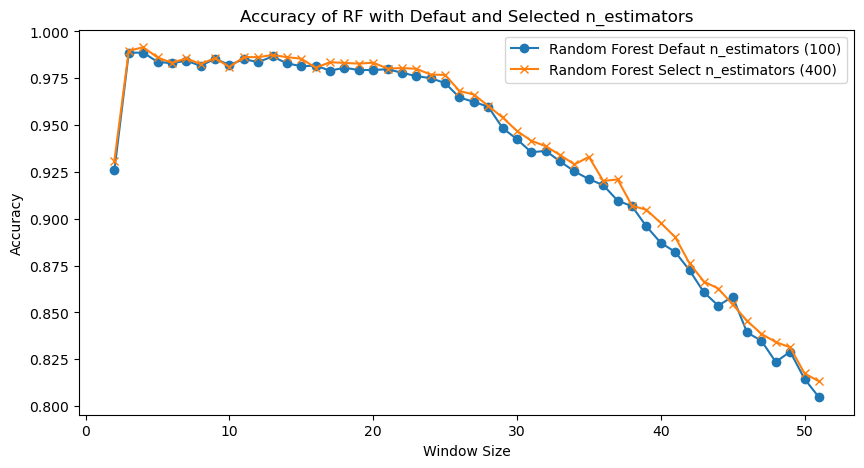

Average accuracy of RF with default n_estimators (100): 0.93445
Average accuracy of RF with selected n_estimators (400): 0.93818


In [6]:
# Plotting the accuracies
plt.figure(figsize=(10, 5))
plt.plot(window_sizes, rf_default_accuracies, label='Random Forest Defaut n_estimators (100)', marker='o')
plt.plot(window_sizes, rf_select_accuracies, label='Random Forest Select n_estimators (400)', marker='x')
plt.xlabel('Window Size')
plt.ylabel('Accuracy')
plt.title('Accuracy of RF with Defaut and Selected n_estimators')
plt.legend()
plt.show()

# Calculating and printing the average accuracies
avg_rf_default_accuracy = np.mean(rf_default_accuracies)
avg_rf_select_accuracy = np.mean(rf_select_accuracies)

print(f"Average accuracy of RF with default n_estimators (100): {avg_rf_default_accuracy:.5f}")
print(f"Average accuracy of RF with selected n_estimators (400): {avg_rf_select_accuracy:.5f}")